# Text Classification
```
----------------------------------------------------------------------
Filename : imdb-reviews-classification.ipynb
Author   : Jaidev Deshpande
Purpose  : Understanding text classification using keras
Libraries: tensorflow.keras,numpy,sklearn and pandas
----------------------------------------------------------------------
```

In [2]:
# Importing Libraries
from tensorflow.keras.preprocessing import text_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## The Problem: Large Movie Dataset Review
### Classify movie reviews from IMDB into positive or negative sentiment.
### Download the dataset [here](https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz)

In [3]:
# Importing dataset
train_ds = text_dataset_from_directory('aclImdb/train')
test_ds = text_dataset_from_directory('aclImdb/test')

dfTrain = pd.DataFrame(train_ds.unbatch().as_numpy_iterator(), columns=['text', 'label'])
dfTest = pd.DataFrame(test_ds.unbatch().as_numpy_iterator(), columns=['text', 'label'])

Found 25001 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [4]:
print(dfTrain.loc[0, 'text'])

b"'One-Round' Jack Sander is called that because he's a carnival boxer who fights any man in the audience. If they can last one round, they win a prize--a popular way to draw customers into traveling shows long ago. Jack is in love with the ticket girl, Mabel, though her head is quickly turned when Bob Corby enters the ring to try his chances with Jack. What no one at the fight knows is that Bob is the champ, so he's able to beat Jack--though it takes him some work. As a result, Bob asks Jack to become his sparring partner and give up the carnival circuit. Later, Jack improves so much that he, too, becomes a legitimate boxer. Slowly, he works his way up the rankings until he's nearly ready to take on the Champ.<br /><br />In the meantime, the Champ and Mabel start running around behind Jack's back--even though by now Mabel has married Jack. So, when the final fight occurs between Jack and Bob, it's very personal and Jack is ready to kill him. Is he good enough? Will rise justifiable ra

In [5]:
pd.options.display.max_colwidth = 100
dfTrain.head()

,text,label
0,"b""'One-Round' Jack Sander is called that because he's a carnival boxer who fights any man in the...",1
1,"b""Return of the Boogyman is a dreadful movie which doesn't play like a movie, it plays like an e...",0
2,"b""That's a problem I have with movies that come on television, when there is nothing else to wat...",0
3,"b'This is a very funny Ealing comedy about a community in central London who, through an unusual...",1
4,"b'I think Jason Lee has huge potential, but this was the WRONG vehicle in which to attempt to br...",0


In [6]:
dfTest.head()

,text,label
0,"b""honestly.. this show warms my heart, i watch it EVERYDAY on fox family and now that the new se...",1
1,"b'The seven collaborations between director Joseph ""von"" Sternberg and star Marlene Dietrich wer...",0
2,"b'In the mountains of Japan, forlorn young artist Sessue Hayakawa (as Tatsu aka ""The Dragon Pain...",0
3,"b'The One is a very aptly name show, mostly because it comes close to being the only network sho...",0
4,"b'It is a risky business to film such a lavish production of ""The Merchant of Venice"". It could ...",1


In [7]:
xts, _ = train_test_split(dfTest, stratify=dfTest['label'], train_size=0.25)

In [8]:
# Converting the text into Tfidf
vect = TfidfVectorizer(stop_words='english', max_features=65536)
XTrain = vect.fit_transform(dfTrain['text']).toarray()
XTest = vect.transform(xts['text']).toarray()

In [9]:
# Defining the model parameters
model = Sequential([
    Dense(128, input_shape=(65536,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=1e-3), metrics=['accuracy'])

In [10]:
# Training the model
history = model.fit(XTrain, dfTrain['label'], batch_size=64, validation_data=(XTest, xts['label']), epochs=50)

Epoch 1/50
391/391 [==============================] - 5s 13ms/step - loss: 0.6931 - accuracy: 0.5102 - val_loss: 0.6931 - val_accuracy: 0.5122
Epoch 2/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6930 - accuracy: 0.5295 - val_loss: 0.6930 - val_accuracy: 0.5275
Epoch 3/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6930 - accuracy: 0.5375 - val_loss: 0.6930 - val_accuracy: 0.5467
Epoch 4/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6929 - accuracy: 0.5609 - val_loss: 0.6929 - val_accuracy: 0.5594
Epoch 5/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6928 - accuracy: 0.5721 - val_loss: 0.6928 - val_accuracy: 0.5704
Epoch 6/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6927 - accuracy: 0.5848 - val_loss: 0.6927 - val_accuracy: 0.5752
Epoch 7/50
391/391 [==============================] - 3s 9ms/step - loss: 0.6926 - accuracy: 0.5938 - val_loss: 0.6926 - val_accuracy: 0.5898
Epoch

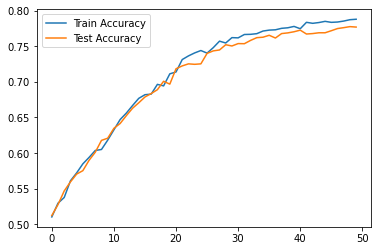

In [11]:
# Plotting accuracy with number of epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()